In [1]:
# From paper: Understanding deep learning requires rethinking generalization
# http://arxiv.org/abs/1611.03530

%pylab inline
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/256.0
x_test = x_test/256.0
x_noise = np.random.uniform(size=x_train.shape)
y_noise = np.random.randint(0, 10, size=y_train.shape)

In [3]:
def get_model():
  # model from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
  # (without the Dropout)
  model = Sequential()
  model.add(Reshape((28,28,1)))
  model.add(Conv2D(32, kernel_size=(3,3), activation='elu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(128, activation='elu'))
  model.add(Dense(10, activation='softmax'))
  model.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [4]:
m = get_model()
learning_normal = m.fit(x_train, y_train, batch_size=256, epochs=40, verbose=0)

In [5]:
m = get_model()
learning_label_noise = m.fit(x_train, y_noise, batch_size=256, epochs=40, verbose=0)

In [6]:
m = get_model()
learning_both_noise = m.fit(x_noise, y_noise, batch_size=256, epochs=40, verbose=0)

Text(0.5,1,'accuracy')

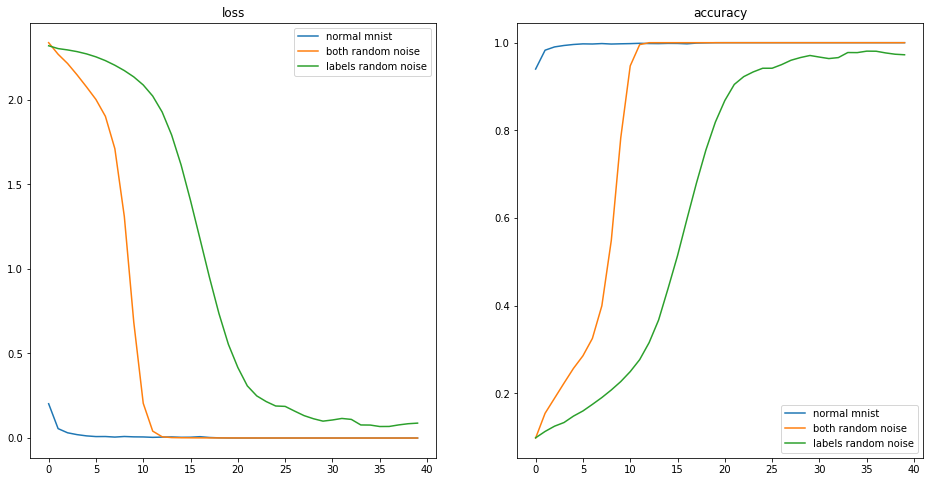

In [7]:
figsize(16,8)
plt.subplot(1, 2, 1)
plot(learning_normal.history['loss'], label="normal mnist")
plot(learning_both_noise.history['loss'], label="both random noise")
plot(learning_label_noise.history['loss'], label="labels random noise")
plt.legend()
plt.title("loss")
plt.subplot(1, 2, 2)
plot(learning_normal.history['accuracy'], label="normal mnist")
plot(learning_both_noise.history['accuracy'], label="both random noise")
plot(learning_label_noise.history['accuracy'], label="labels random noise")
plt.legend()
plt.title("accuracy")